In [8]:
import pandas as pd
from preprocess import getPopularityIndex
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
X = pd.read_pickle('TwitterData_1e5_90rm.pkl')

(array([1889., 7172., 2042., 4298., 5066.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

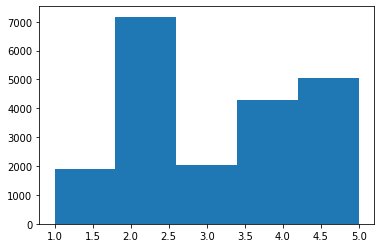

In [10]:
y = getPopularityIndex(X, 4)
plt.hist(y, bins=5)

In [11]:
from preprocess import mostFrequentWords
X = mostFrequentWords(X)

In [12]:
X.to_pickle('TwitterData_1e5_90rm_MFW.pkl')

In [13]:
from preprocess import cleanData
X = cleanData(X)

In [29]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [30]:
numerical_columns = X._get_numeric_data().columns
categorical_columns = list(set(X.columns) - set(numerical_columns))

categorical_preprocessor = OneHotEncoder(handle_unknown='ignore', drop='first')
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)
    ])

In [48]:
feature_selection = SelectFromModel(RandomForestClassifier(), threshold = 0.01)
model = make_pipeline(preprocessor, feature_selection, RandomForestClassifier())

In [49]:
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['has_like', 'time',
                                                   'has_sorry', 'has_us',
                                                   'has_see', 'has_hi',
                                                   'has_urls', 'has_photo',
                                                   'has_symbols', 'day',
                                                   'has_gif', 'has_thanks',
                                                   'has_team', 'is_reply',
                                                   'has_amp', 'has_questions',
                                                   'has_please', 'has_video',
                                                   

In [57]:
len(model[:-1].get_feature_names_out())

22